In [1]:
import pandas as pd

In [4]:
pk = pd.read_csv('/Users/julia/Downloads/pokemon.csv')

In [5]:
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


For each Pokemon Type is there a clear increase in avrage attack if it is legendary?

In [8]:
pk.groupby(['Type 1', 'Legendary'])[['Attack']].mean()

Attack
Type 1   Legendary            
Bug      False       70.971014
Dark     False       86.862069
         True       110.500000
Dragon   False      103.400000
         True       126.666667
Electric False       66.125000
         True        98.750000
Fairy    False       57.187500
         True       131.000000
Fighting False       96.777778
Fire     False       82.191489
         True       109.000000
Flying   False       50.000000
         True       107.500000
Ghost    False       71.366667
         True       110.000000
Grass    False       72.119403
         True        97.666667
Ground   False       88.000000
         True       150.000000
Ice      False       73.227273
         True        67.500000
Normal   False       72.083333
         True       140.000000
Poison   False       74.678571
Psychic  False       54.953488
         True       122.142857
Rock     False       89.925000
         True       122.250000
Steel    False       92.086957
         True        96.250000
Water    False       72.777778
         True       111.250000

In [9]:
pk

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


What is the most common pair of Pokemon Types?

In [40]:
pk_types = pk.groupby(['Type 1', 'Type 2'])[['Name']].count().sort_values(by='Name', ascending = False)

In [41]:
pk_types

Name
Type 1   Type 2      
Normal   Flying    24
Grass    Poison    15
Bug      Flying    14
         Poison    12
Ghost    Grass     10
...               ...
Fire     Rock       1
Ice      Ghost      1
Fire     Dragon     1
Fighting Flying     1
Water    Steel      1

[136 rows x 1 columns]

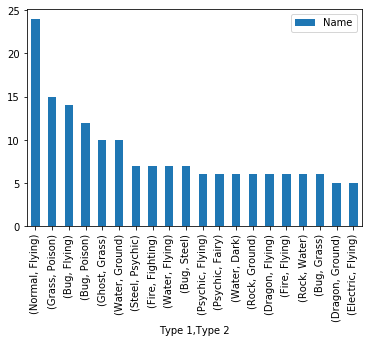

In [45]:
pk_types.head(20).plot.bar()

In [46]:
matrix = pk_types.unstack()

In [47]:
matrix = matrix['Name']
matrix

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,2.0,NaN,2.0,2.0,14.0,1.0,6.0,2.0,NaN,NaN,12.0,NaN,3.0,7.0,1.0
Dark,NaN,NaN,3.0,NaN,NaN,2.0,3.0,5.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
Dragon,NaN,NaN,NaN,1.0,1.0,NaN,1.0,6.0,NaN,NaN,5.0,3.0,NaN,NaN,4.0,NaN,NaN,NaN
Electric,NaN,NaN,1.0,NaN,1.0,NaN,1.0,5.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,NaN,3.0,1.0
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
Fire,NaN,NaN,1.0,NaN,NaN,7.0,NaN,6.0,NaN,NaN,3.0,NaN,2.0,NaN,2.0,1.0,1.0,1.0
Flying,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,1.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,10.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN


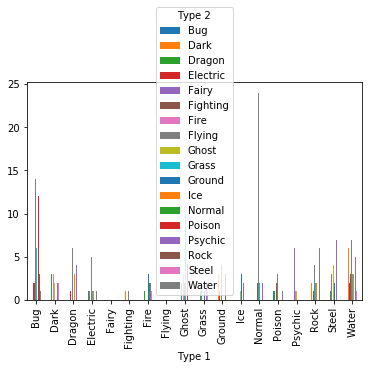

In [48]:
matrix.plot.bar()